In [1]:
import pandas as pd #pandas library is used for working with datasets.It has function for analyzign cleaning exploring and manipulating data 
import numpy as np #numpy as multidimensional array 


In [2]:
import matplotlib.pyplot as plt # Matplotlib allows user to create numerous and diverse plot types
import seaborn as sns #Seaborn is python data visualization library based on matplotlib
import plotly.express as px #plotly express is the easy to use, high level interface to Plotly which operates on a variety of types of data and produces easy to style figures 
from matplotlib import style # is used to create plot styles 
import re # regular expressions if needed 
import nltk # natural language toolkit used for natural language processing 
import random 
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mohit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
from nltk.tokenize import word_tokenize #is used to word tokenization using nltk library  
from nltk.stem import PorterStemmer #is used to step the words
from nltk.corpus import stopwords #import stop words( a set of words for pausing)
stopwords = set(stopwords.words('english'))
from wordcloud import WordCloud ,STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer #used in vectorization 
from sklearn.model_selection import train_test_split #training the model 
from nltk.stem import WordNetLemmatizer # Lematization is the process of grouping together different inflected forms of a word so they can be analysed as a single item 



In [4]:
df= pd.read_csv(r"CSV_Files\Final_Data - Sheet1.csv")


In [5]:
df.head()

Genre                 MovieName  \
0  Action  The Shawshank Redemption   
1  Action  The Shawshank Redemption   
2  Action  The Shawshank Redemption   
3  Action  The Shawshank Redemption   
4  Action  The Shawshank Redemption   

                                            Overview  User_ID  \
0  Chronicles the experiences of a formerly succe...    123.0   
1  Chronicles the experiences of a formerly succe...    122.0   
2  Chronicles the experiences of a formerly succe...    123.0   
3  Chronicles the experiences of a formerly succe...    105.0   
4  Chronicles the experiences of a formerly succe...    118.0   

                                             Reviews Ratings  Movie_ID  
0  The Shawshank Redemption holds the Number 1 sp...      10       1.0  
1  However delightful as it is The Shawshank Rede...      10       1.0  
2  However delightful as it is The Shawshank Rede...      10       1.0  
3  "The Shawshank Redemption" is a cinematic gem ...      10       1.0  
4  "Hope is a good thing probably best of all & g...      10       1.0

In [6]:
df.shape

(4005, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Genre      3980 non-null   object 
 1   MovieName  3980 non-null   object 
 2   Overview   3980 non-null   object 
 3   User_ID    3980 non-null   float64
 4   Reviews    3979 non-null   object 
 5   Ratings    3980 non-null   object 
 6   Movie_ID   3987 non-null   float64
dtypes: float64(2), object(5)
memory usage: 219.2+ KB


In [8]:
df.isnull().mean()*100

Genre        0.624220
MovieName    0.624220
Overview     0.624220
User_ID      0.624220
Reviews      0.649189
Ratings      0.624220
Movie_ID     0.449438
dtype: float64

In [9]:
df['Reviews'].dropna(inplace = True)

In [10]:
df.isnull().mean()*100

Genre        0.624220
MovieName    0.624220
Overview     0.624220
User_ID      0.624220
Reviews      0.649189
Ratings      0.624220
Movie_ID     0.449438
dtype: float64

In [11]:
df.shape

(4005, 7)

In [12]:
len(df)-len(df.drop_duplicates())
#there are 0 duplicate data 

23

In [13]:
#used for droping the non numeric values present in the 
df =df[pd.to_numeric(df['Ratings'],errors='coerce').notnull()] 

In [14]:
df.isnull().mean()*100

Genre        0.000000
MovieName    0.000000
Overview     0.000000
User_ID      0.000000
Reviews      0.025517
Ratings      0.000000
Movie_ID     0.000000
dtype: float64

<Axes: xlabel='Ratings'>

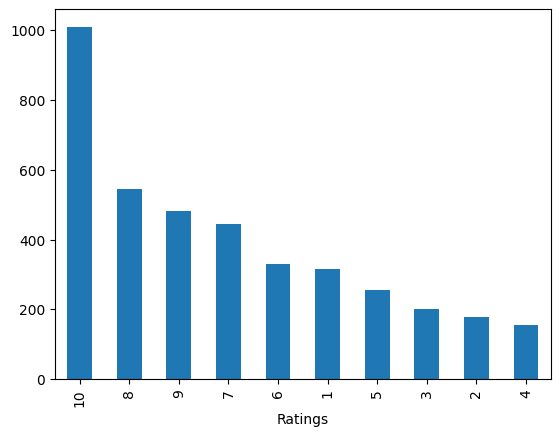

In [15]:
# bar plot to see the number of ratings present in each 
df['Ratings'].value_counts().sort_values(ascending = False).plot.bar() 

In [16]:
df.head()

Genre                 MovieName  \
0  Action  The Shawshank Redemption   
1  Action  The Shawshank Redemption   
2  Action  The Shawshank Redemption   
3  Action  The Shawshank Redemption   
4  Action  The Shawshank Redemption   

                                            Overview  User_ID  \
0  Chronicles the experiences of a formerly succe...    123.0   
1  Chronicles the experiences of a formerly succe...    122.0   
2  Chronicles the experiences of a formerly succe...    123.0   
3  Chronicles the experiences of a formerly succe...    105.0   
4  Chronicles the experiences of a formerly succe...    118.0   

                                             Reviews Ratings  Movie_ID  
0  The Shawshank Redemption holds the Number 1 sp...      10       1.0  
1  However delightful as it is The Shawshank Rede...      10       1.0  
2  However delightful as it is The Shawshank Rede...      10       1.0  
3  "The Shawshank Redemption" is a cinematic gem ...      10       1.0  
4  "Hope is a good thing probably best of all & g...      10       1.0

Bar plot(Numerical- Categorical)

In [17]:
df['Ratings'] = pd.to_numeric(df['Ratings'])

<Axes: xlabel='Ratings', ylabel='Genre'>

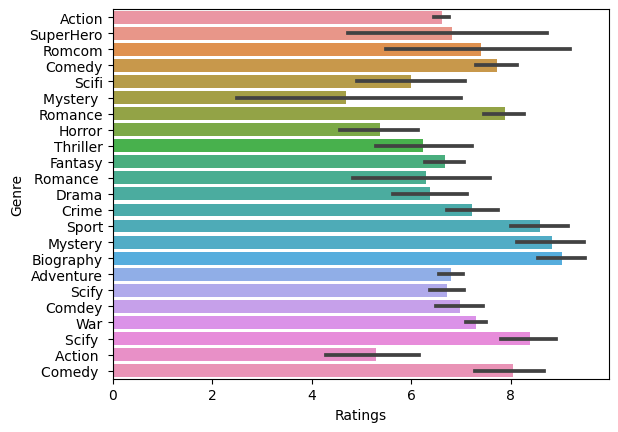

In [18]:
sns.barplot(x=df.Ratings,y = df.Genre)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3919 entries, 0 to 3979
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Genre      3919 non-null   object 
 1   MovieName  3919 non-null   object 
 2   Overview   3919 non-null   object 
 3   User_ID    3919 non-null   float64
 4   Reviews    3918 non-null   object 
 5   Ratings    3919 non-null   int64  
 6   Movie_ID   3919 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 244.9+ KB


In [20]:
man_value = df['Ratings'].max()
print(man_value)

10


In [21]:
df.head()

Genre                 MovieName  \
0  Action  The Shawshank Redemption   
1  Action  The Shawshank Redemption   
2  Action  The Shawshank Redemption   
3  Action  The Shawshank Redemption   
4  Action  The Shawshank Redemption   

                                            Overview  User_ID  \
0  Chronicles the experiences of a formerly succe...    123.0   
1  Chronicles the experiences of a formerly succe...    122.0   
2  Chronicles the experiences of a formerly succe...    123.0   
3  Chronicles the experiences of a formerly succe...    105.0   
4  Chronicles the experiences of a formerly succe...    118.0   

                                             Reviews  Ratings  Movie_ID  
0  The Shawshank Redemption holds the Number 1 sp...       10       1.0  
1  However delightful as it is The Shawshank Rede...       10       1.0  
2  However delightful as it is The Shawshank Rede...       10       1.0  
3  "The Shawshank Redemption" is a cinematic gem ...       10       1.0  
4  "Hope is a good thing probably best of all & g...       10       1.0

In [22]:
check = df[df['Genre'] == 'Romance']#['Ratings']

In [23]:
check.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 61 to 3929
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Genre      160 non-null    object 
 1   MovieName  160 non-null    object 
 2   Overview   160 non-null    object 
 3   User_ID    160 non-null    float64
 4   Reviews    160 non-null    object 
 5   Ratings    160 non-null    int64  
 6   Movie_ID   160 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 10.0+ KB


These two heatmaps will help us understand the distribution of the ratings per genre 


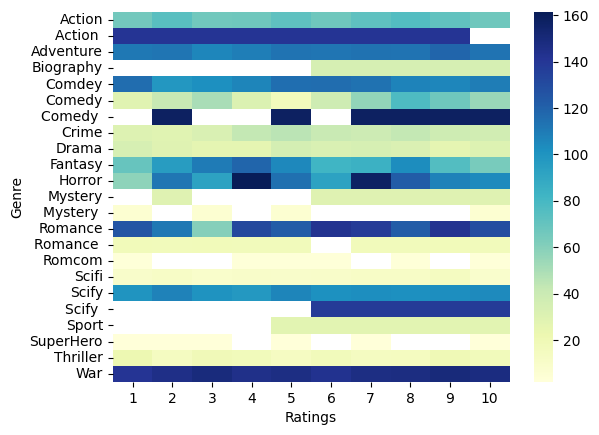

In [24]:
movie_matrix = df.pivot_table(index = 'Genre',columns="Ratings",values = 'Movie_ID')
sns.heatmap(movie_matrix,cmap="YlGnBu", fmt="0.0f")
plt.show()

<Axes: xlabel='Ratings', ylabel='Genre'>

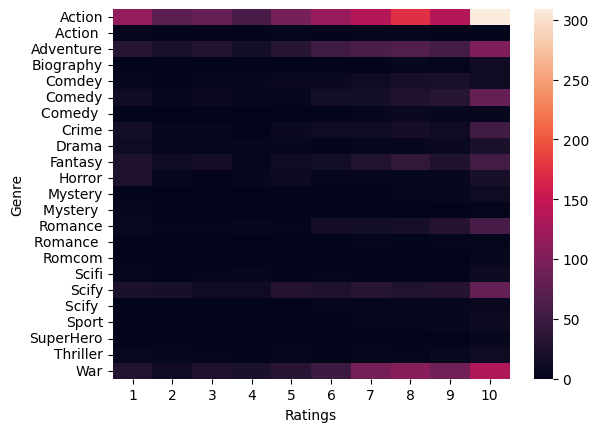

In [25]:
sns.heatmap(pd.crosstab(df['Genre'],df['Ratings']))

In [26]:
df.dropna(subset=['Reviews'],inplace = True)

In [27]:
df.isnull().mean()*100

Genre        0.0
MovieName    0.0
Overview     0.0
User_ID      0.0
Reviews      0.0
Ratings      0.0
Movie_ID     0.0
dtype: float64

In [28]:
df.head()

Genre                 MovieName  \
0  Action  The Shawshank Redemption   
1  Action  The Shawshank Redemption   
2  Action  The Shawshank Redemption   
3  Action  The Shawshank Redemption   
4  Action  The Shawshank Redemption   

                                            Overview  User_ID  \
0  Chronicles the experiences of a formerly succe...    123.0   
1  Chronicles the experiences of a formerly succe...    122.0   
2  Chronicles the experiences of a formerly succe...    123.0   
3  Chronicles the experiences of a formerly succe...    105.0   
4  Chronicles the experiences of a formerly succe...    118.0   

                                             Reviews  Ratings  Movie_ID  
0  The Shawshank Redemption holds the Number 1 sp...       10       1.0  
1  However delightful as it is The Shawshank Rede...       10       1.0  
2  However delightful as it is The Shawshank Rede...       10       1.0  
3  "The Shawshank Redemption" is a cinematic gem ...       10       1.0  
4  "Hope is a good thing probably best of all & g...       10       1.0

In [29]:
from nltk.corpus import stopwords # imports stop works( a set of words used to pausing)
stop_words = set(stopwords.words('english')) #

In [30]:
#this function and this block of code returns the sentiment of the user and the amount of positive and negative words per review 
lemma = WordNetLemmatizer()
stop_words = stopwords.words('english')
def text_prep(x: str) -> list:
     corp = str(x).lower() 
     corp = re.sub('[^a-zA-Z]+',' ', corp).strip() 
     tokens = word_tokenize(corp)
     words = [t for t in tokens if t not in stop_words]
     lemmatize = [lemma.lemmatize(w) for w in words]
     return lemmatize
preprocess_tag = [text_prep(i) for i in df['Reviews']]
df["preprocess_txt"] = preprocess_tag
df['total_len'] = df['preprocess_txt'].map(lambda x: len(x))
file = open('negative-words.txt', 'r')
neg_words = file.read().split()
file = open('positive-words.txt', 'r')
pos_words = file.read().split()
num_pos = df['preprocess_txt'].map(lambda x: len([i for i in x if i in pos_words]))
df['pos_count'] = num_pos
num_neg = df['preprocess_txt'].map(lambda x: len([i for i in x if i in neg_words]))
df['neg_count'] = num_neg
df['sentiment'] = round(((df['pos_count'] - df['neg_count']) / df['total_len']), 2)
df.head()


Genre                 MovieName  \
0  Action  The Shawshank Redemption   
1  Action  The Shawshank Redemption   
2  Action  The Shawshank Redemption   
3  Action  The Shawshank Redemption   
4  Action  The Shawshank Redemption   

                                            Overview  User_ID  \
0  Chronicles the experiences of a formerly succe...    123.0   
1  Chronicles the experiences of a formerly succe...    122.0   
2  Chronicles the experiences of a formerly succe...    123.0   
3  Chronicles the experiences of a formerly succe...    105.0   
4  Chronicles the experiences of a formerly succe...    118.0   

                                             Reviews  Ratings  Movie_ID  \
0  The Shawshank Redemption holds the Number 1 sp...       10       1.0   
1  However delightful as it is The Shawshank Rede...       10       1.0   
2  However delightful as it is The Shawshank Rede...       10       1.0   
3  "The Shawshank Redemption" is a cinematic gem ...       10       1.0   
4  "Hope is a good thing probably best of all & g...       10       1.0   

                                      preprocess_txt  total_len  pos_count  \
0  [shawshank, redemption, hold, number, spot, to...        274         45   
1  [however, delightful, shawshank, redemption, a...        303         45   
2  [however, delightful, shawshank, redemption, a...        303         45   
3  [shawshank, redemption, cinematic, gem, transc...        229         31   
4  [hope, good, thing, probably, best, good, thin...        160         18   

   neg_count  sentiment  
0         12       0.12  
1         23       0.07  
2         23       0.07  
3         10       0.09  
4         18       0.00

In [31]:
df = df.drop(['pos_count','neg_count'],axis = 1)

In [32]:
df.head()

Genre                 MovieName  \
0  Action  The Shawshank Redemption   
1  Action  The Shawshank Redemption   
2  Action  The Shawshank Redemption   
3  Action  The Shawshank Redemption   
4  Action  The Shawshank Redemption   

                                            Overview  User_ID  \
0  Chronicles the experiences of a formerly succe...    123.0   
1  Chronicles the experiences of a formerly succe...    122.0   
2  Chronicles the experiences of a formerly succe...    123.0   
3  Chronicles the experiences of a formerly succe...    105.0   
4  Chronicles the experiences of a formerly succe...    118.0   

                                             Reviews  Ratings  Movie_ID  \
0  The Shawshank Redemption holds the Number 1 sp...       10       1.0   
1  However delightful as it is The Shawshank Rede...       10       1.0   
2  However delightful as it is The Shawshank Rede...       10       1.0   
3  "The Shawshank Redemption" is a cinematic gem ...       10       1.0   
4  "Hope is a good thing probably best of all & g...       10       1.0   

                                      preprocess_txt  total_len  sentiment  
0  [shawshank, redemption, hold, number, spot, to...        274       0.12  
1  [however, delightful, shawshank, redemption, a...        303       0.07  
2  [however, delightful, shawshank, redemption, a...        303       0.07  
3  [shawshank, redemption, cinematic, gem, transc...        229       0.09  
4  [hope, good, thing, probably, best, good, thin...        160       0.00

Rating Distribution

Text(0.5, 1.0, 'Ratings Distribution')

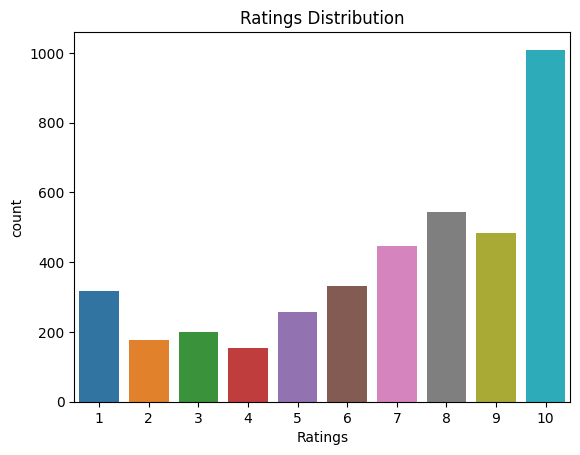

In [33]:
sns.countplot(x= 'Ratings',data = df)
plt.title("Ratings Distribution")

C:\Users\mohit\AppData\Local\Temp\ipykernel_6800\1749631374.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ratings'],hist = True)


<Axes: xlabel='Ratings', ylabel='Density'>

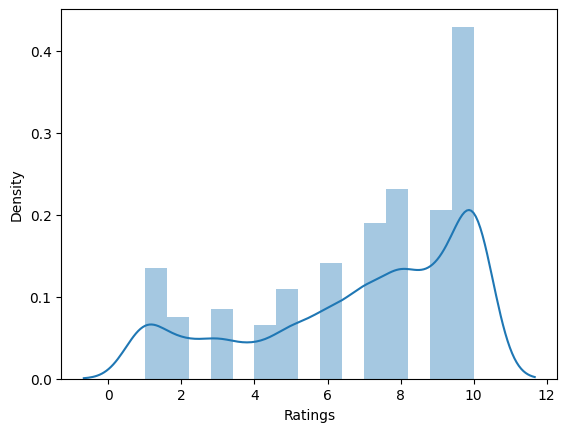

In [34]:
sns.distplot(df['Ratings'],hist = True)

Text(0.5, 1.0, 'Sentiment Distribution')

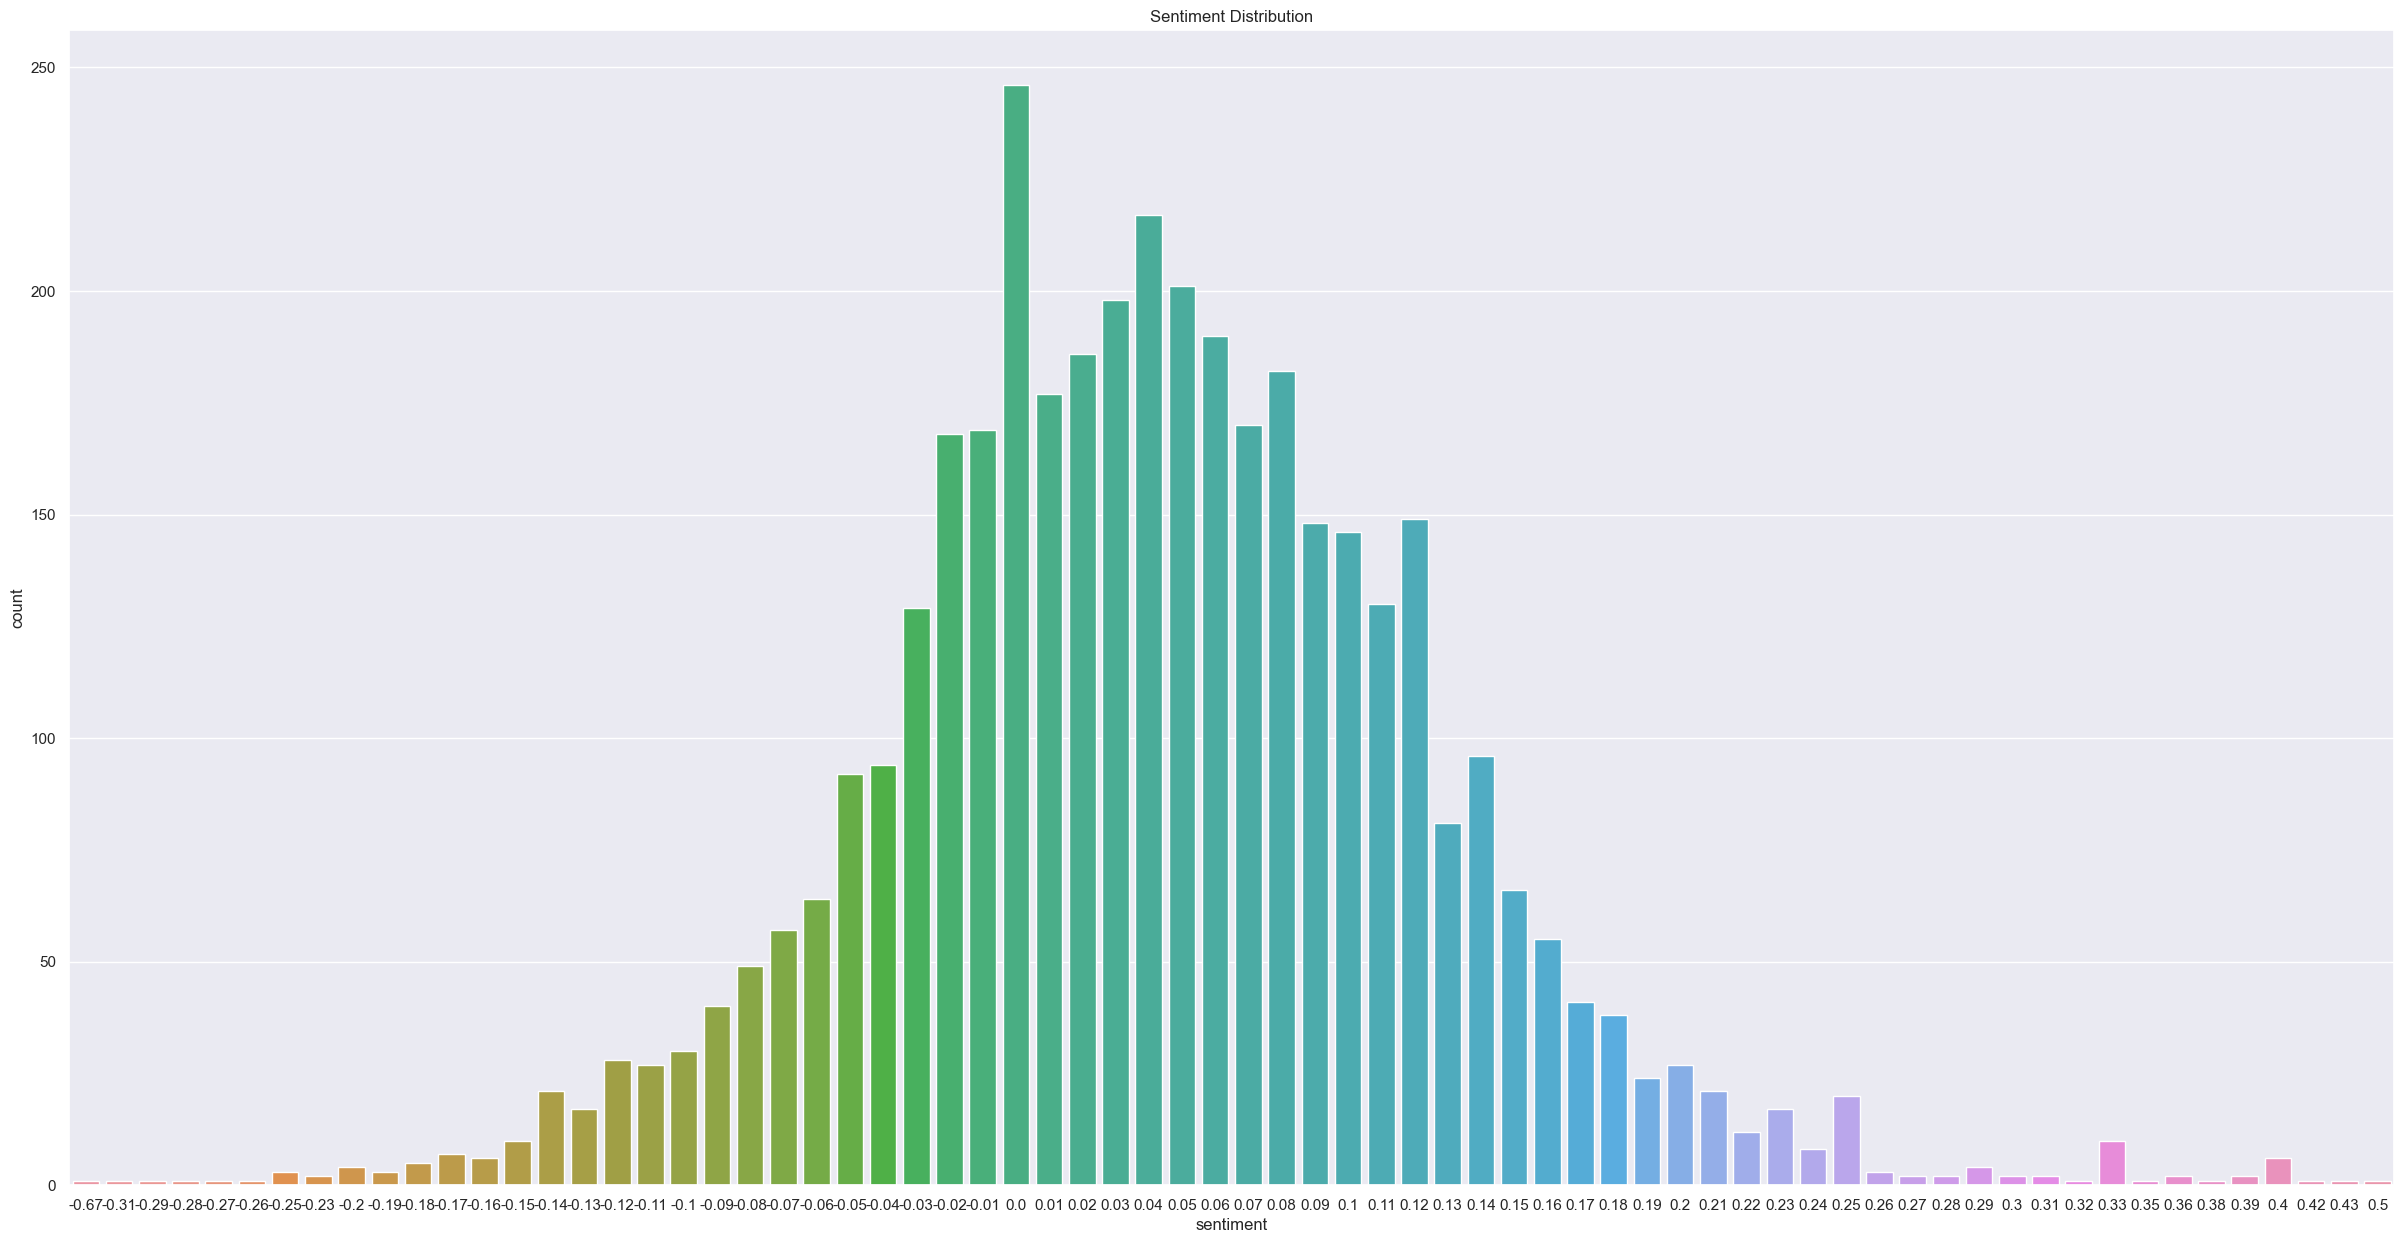

In [35]:
# sentiments of users distributed across the range
sns.set(rc = {'figure.figsize':(30,15)})
sns.countplot(x = 'sentiment',data = df)
plt.title("Sentiment Distribution")

In [36]:
df.head()

Genre                 MovieName  \
0  Action  The Shawshank Redemption   
1  Action  The Shawshank Redemption   
2  Action  The Shawshank Redemption   
3  Action  The Shawshank Redemption   
4  Action  The Shawshank Redemption   

                                            Overview  User_ID  \
0  Chronicles the experiences of a formerly succe...    123.0   
1  Chronicles the experiences of a formerly succe...    122.0   
2  Chronicles the experiences of a formerly succe...    123.0   
3  Chronicles the experiences of a formerly succe...    105.0   
4  Chronicles the experiences of a formerly succe...    118.0   

                                             Reviews  Ratings  Movie_ID  \
0  The Shawshank Redemption holds the Number 1 sp...       10       1.0   
1  However delightful as it is The Shawshank Rede...       10       1.0   
2  However delightful as it is The Shawshank Rede...       10       1.0   
3  "The Shawshank Redemption" is a cinematic gem ...       10       1.0   
4  "Hope is a good thing probably best of all & g...       10       1.0   

                                      preprocess_txt  total_len  sentiment  
0  [shawshank, redemption, hold, number, spot, to...        274       0.12  
1  [however, delightful, shawshank, redemption, a...        303       0.07  
2  [however, delightful, shawshank, redemption, a...        303       0.07  
3  [shawshank, redemption, cinematic, gem, transc...        229       0.09  
4  [hope, good, thing, probably, best, good, thin...        160       0.00

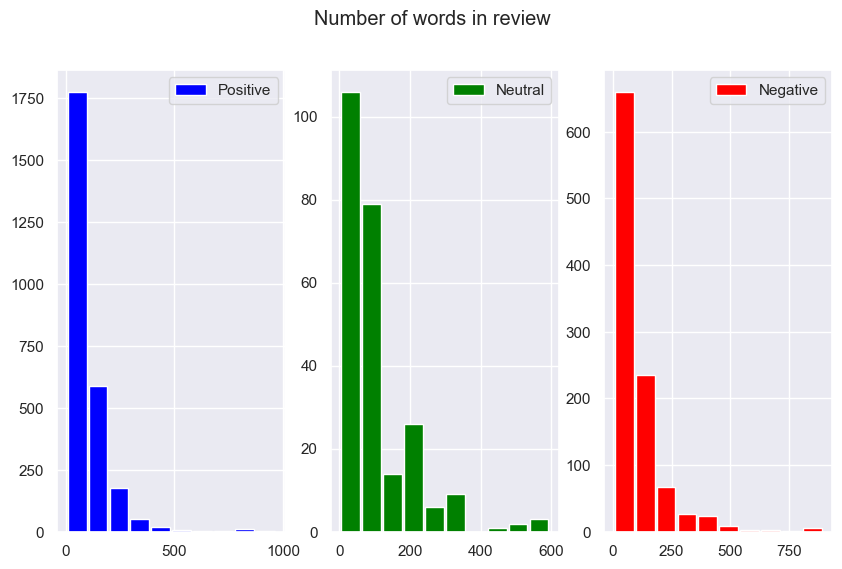

In [37]:
fig, ax = plt.subplots(1,3,figsize=(10,6))
ax[0].hist(df[df['sentiment'] > 0]['total_len'], label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 0]['total_len'], label='Neutral', color='green', rwidth=0.9);
ax[1].legend(loc='upper right');
ax[2].hist(df[df['sentiment'] <0 ]['total_len'], label='Negative', color='red', rwidth=0.9);
ax[2].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

In [38]:
df.head()

Genre                 MovieName  \
0  Action  The Shawshank Redemption   
1  Action  The Shawshank Redemption   
2  Action  The Shawshank Redemption   
3  Action  The Shawshank Redemption   
4  Action  The Shawshank Redemption   

                                            Overview  User_ID  \
0  Chronicles the experiences of a formerly succe...    123.0   
1  Chronicles the experiences of a formerly succe...    122.0   
2  Chronicles the experiences of a formerly succe...    123.0   
3  Chronicles the experiences of a formerly succe...    105.0   
4  Chronicles the experiences of a formerly succe...    118.0   

                                             Reviews  Ratings  Movie_ID  \
0  The Shawshank Redemption holds the Number 1 sp...       10       1.0   
1  However delightful as it is The Shawshank Rede...       10       1.0   
2  However delightful as it is The Shawshank Rede...       10       1.0   
3  "The Shawshank Redemption" is a cinematic gem ...       10       1.0   
4  "Hope is a good thing probably best of all & g...       10       1.0   

                                      preprocess_txt  total_len  sentiment  
0  [shawshank, redemption, hold, number, spot, to...        274       0.12  
1  [however, delightful, shawshank, redemption, a...        303       0.07  
2  [however, delightful, shawshank, redemption, a...        303       0.07  
3  [shawshank, redemption, cinematic, gem, transc...        229       0.09  
4  [hope, good, thing, probably, best, good, thin...        160       0.00

In [39]:
def categorize_movie_rating(sentiment):
    if sentiment >0:
        return "positive"; #3 means positve rating
    elif sentiment == 0:
        return "neutral"; #neutral
    else:
        return "negative"; #not liked rating
     
df['Sentiment_Ratings'] = df['sentiment'].apply(categorize_movie_rating)
df.head()

Genre                 MovieName  \
0  Action  The Shawshank Redemption   
1  Action  The Shawshank Redemption   
2  Action  The Shawshank Redemption   
3  Action  The Shawshank Redemption   
4  Action  The Shawshank Redemption   

                                            Overview  User_ID  \
0  Chronicles the experiences of a formerly succe...    123.0   
1  Chronicles the experiences of a formerly succe...    122.0   
2  Chronicles the experiences of a formerly succe...    123.0   
3  Chronicles the experiences of a formerly succe...    105.0   
4  Chronicles the experiences of a formerly succe...    118.0   

                                             Reviews  Ratings  Movie_ID  \
0  The Shawshank Redemption holds the Number 1 sp...       10       1.0   
1  However delightful as it is The Shawshank Rede...       10       1.0   
2  However delightful as it is The Shawshank Rede...       10       1.0   
3  "The Shawshank Redemption" is a cinematic gem ...       10       1.0   
4  "Hope is a good thing probably best of all & g...       10       1.0   

                                      preprocess_txt  total_len  sentiment  \
0  [shawshank, redemption, hold, number, spot, to...        274       0.12   
1  [however, delightful, shawshank, redemption, a...        303       0.07   
2  [however, delightful, shawshank, redemption, a...        303       0.07   
3  [shawshank, redemption, cinematic, gem, transc...        229       0.09   
4  [hope, good, thing, probably, best, good, thin...        160       0.00   

  Sentiment_Ratings  
0          positive  
1          positive  
2          positive  
3          positive  
4           neutral

For postive reviews

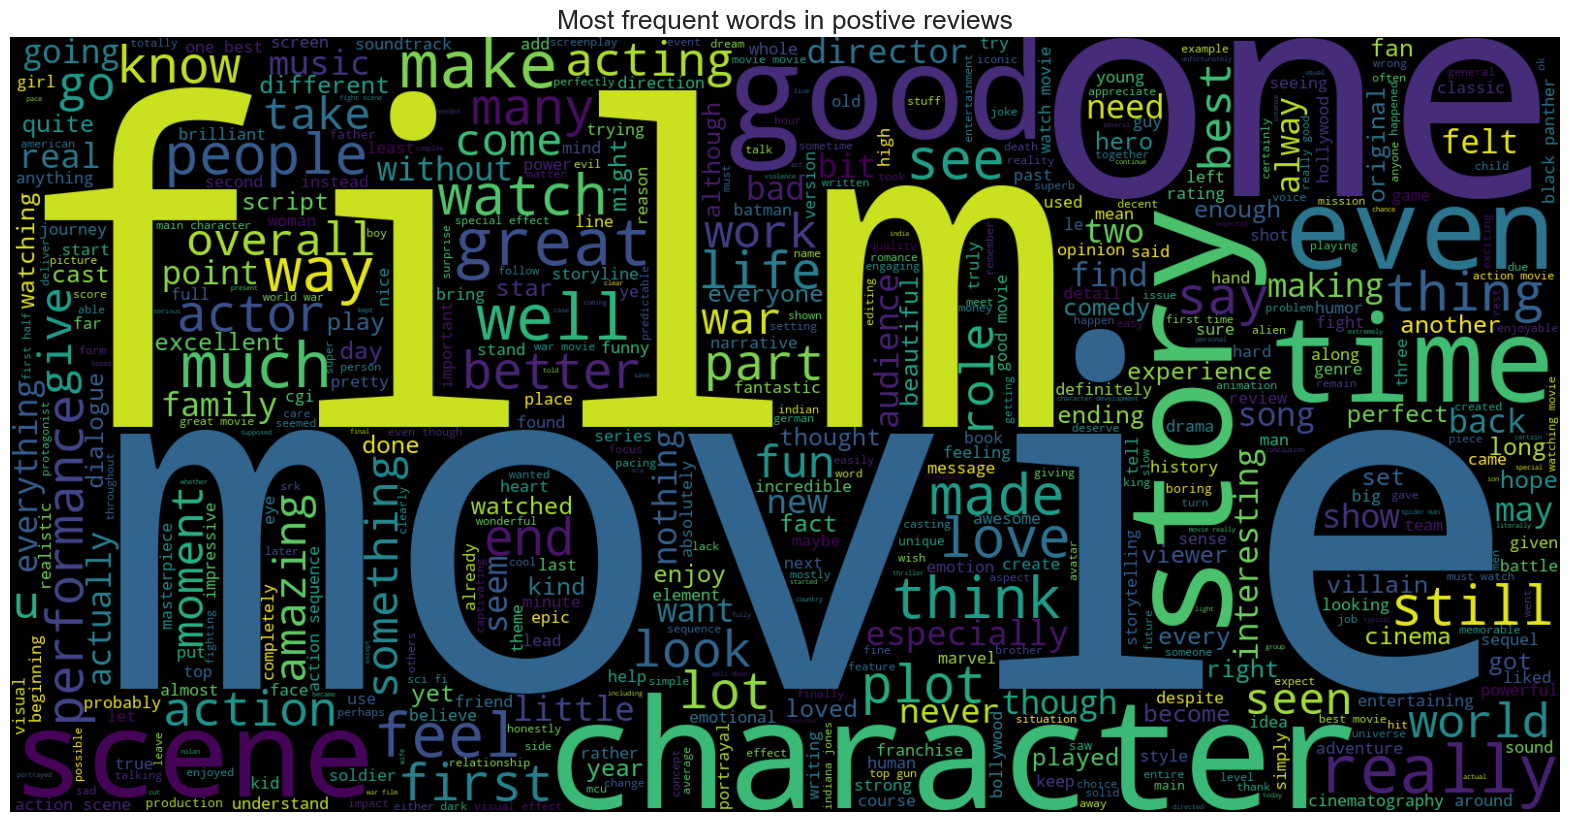

In [40]:
#visual representation of most frequent words in positive reviews
pos_reviews = df[df.sentiment >0]
text =' '.join([str(word) for review in pos_reviews['preprocess_txt']for word in review])

plt.figure(figsize = (20,15),facecolor='None')
wordcloud = WordCloud(max_words = 500,width=1600,height = 800).generate(text)
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.title('Most frequent words in postive reviews',fontsize = 19)
plt.show()

In [41]:
stemmed_token = [word for review in pos_reviews['preprocess_txt']for word in review]

#compute frequency distribution
freq_dist = nltk.FreqDist(stemmed_token)

#print most common words
print(freq_dist.most_common(10))

[('movie', 6798), ('film', 5283), ('like', 2272), ('one', 2185), ('character', 2001), ('good', 1939), ('story', 1866), ('time', 1700), ('scene', 1471), ('well', 1383)]


In [42]:
pos_words = pd.DataFrame(freq_dist.most_common(15))
pos_words.columns = ['words','count']

pos_words.head()

words  count
0      movie   6798
1       film   5283
2       like   2272
3        one   2185
4  character   2001

Plotting a bar graph for the positive words in the reviews 


In [43]:
px.bar(pos_words,x = 'count',y ='words',title = "Common words in positive reviews")

for neutral reviews 

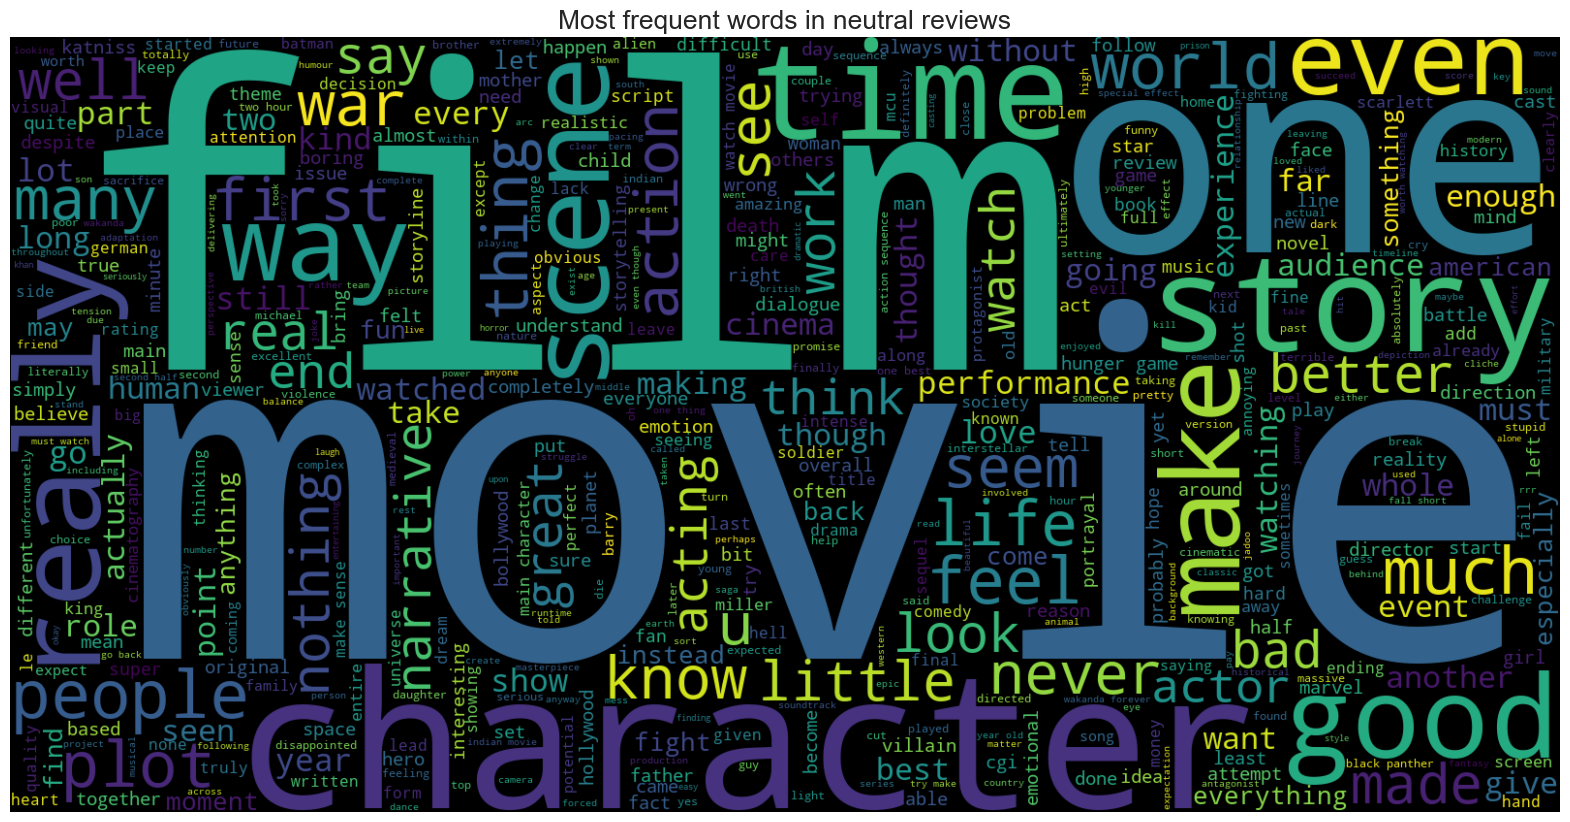

In [44]:
neu_reviews = df[df.sentiment ==0 ]
#visual representation of most frequent words in positive reviews 
text = ' '.join([str(word) for review in neu_reviews['preprocess_txt'] for word in review])

plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in neutral reviews', fontsize = 19)
plt.show()

In [45]:
stemmed_token = [word for review in neu_reviews['preprocess_txt']for word in review]

#compute frequency distribution 
freq_dist = nltk.FreqDist(stemmed_token)

# print the most common words 
print(freq_dist.most_common(10))

[('movie', 520), ('film', 391), ('like', 202), ('one', 185), ('character', 173), ('time', 155), ('story', 155), ('would', 135), ('make', 119), ('scene', 114)]


In [46]:
neu_words = pd.DataFrame(freq_dist.most_common(15))
neu_words.columns =['word','count']
neu_words[:10]

word  count
0      movie    520
1       film    391
2       like    202
3        one    185
4  character    173
5       time    155
6      story    155
7      would    135
8       make    119
9      scene    114

In [47]:
px.bar(neu_words , x='count',y='word',title = 'Common words in Neutral Reviews')

For negative reviews

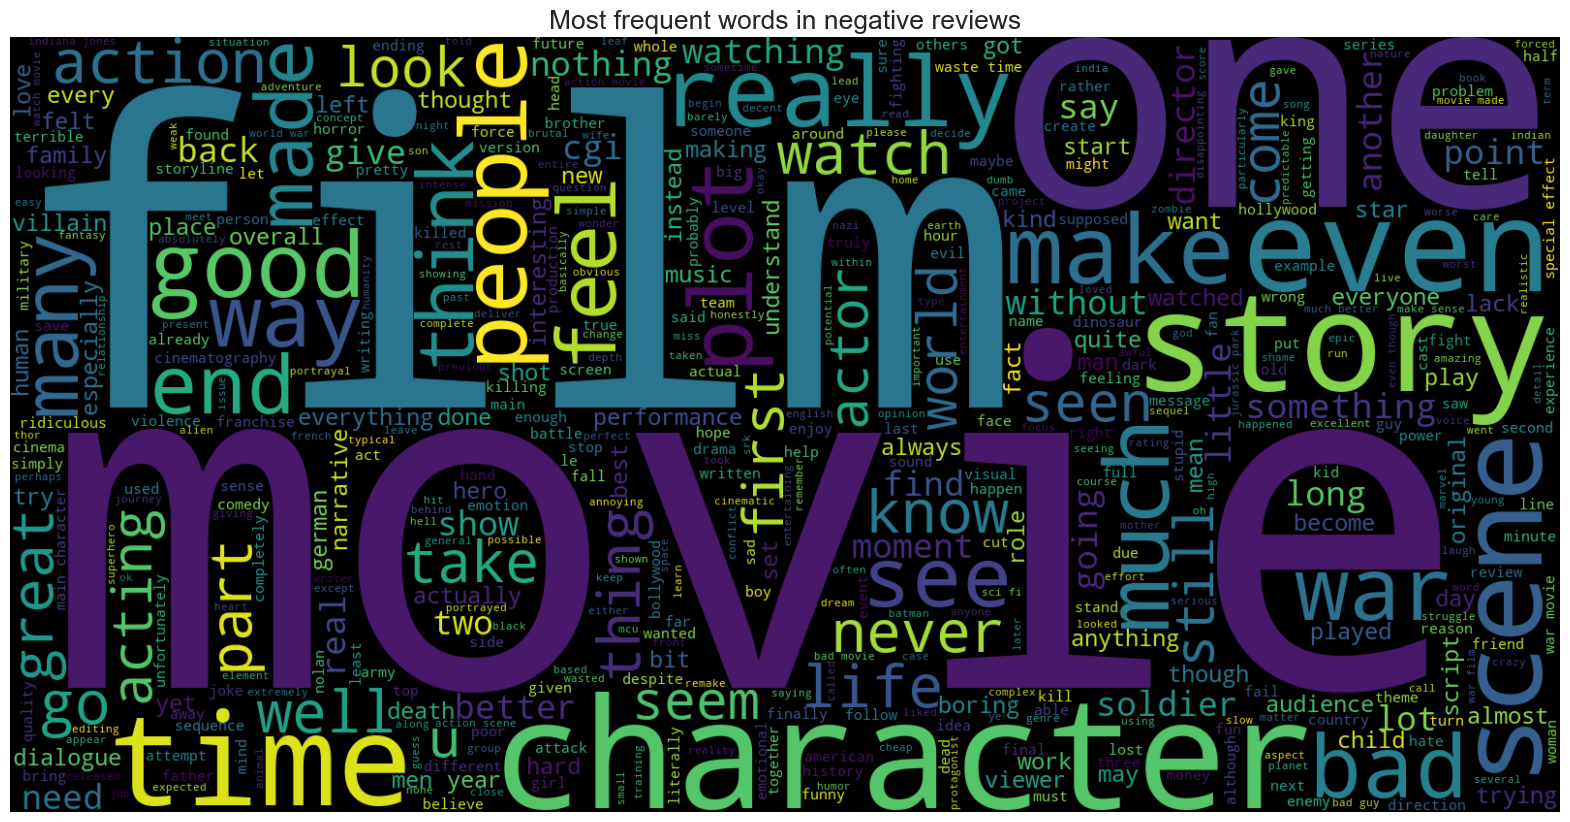

In [48]:
neg_reviews = df[df.sentiment<0]
#visual representation of most frequent words in positive reviews 
text = ' '.join([str(word) for review in neg_reviews['preprocess_txt'] for word in review])

plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

In [49]:
stemmed_tokens = [word for review in neg_reviews['preprocess_txt'] for word in review]

#compute frequency distribution 
freq_dist = nltk.FreqDist(stemmed_tokens)

#print most common words 
print(freq_dist.most_common(10))

[('movie', 2378), ('film', 1688), ('one', 858), ('character', 806), ('like', 776), ('war', 638), ('time', 616), ('story', 614), ('even', 519), ('scene', 503)]


In [50]:
neg_words = pd.DataFrame(freq_dist.most_common(15))
neg_words.columns = ['words','count']
neg_words[:10]

words  count
0      movie   2378
1       film   1688
2        one    858
3  character    806
4       like    776
5        war    638
6       time    616
7      story    614
8       even    519
9      scene    503

In [51]:
#ploting a bar graph for the positive words in the reviews
px.bar(neg_words, x='count', y='words', title='Common words in Negative reviews')

In [52]:
df.head()

Genre                 MovieName  \
0  Action  The Shawshank Redemption   
1  Action  The Shawshank Redemption   
2  Action  The Shawshank Redemption   
3  Action  The Shawshank Redemption   
4  Action  The Shawshank Redemption   

                                            Overview  User_ID  \
0  Chronicles the experiences of a formerly succe...    123.0   
1  Chronicles the experiences of a formerly succe...    122.0   
2  Chronicles the experiences of a formerly succe...    123.0   
3  Chronicles the experiences of a formerly succe...    105.0   
4  Chronicles the experiences of a formerly succe...    118.0   

                                             Reviews  Ratings  Movie_ID  \
0  The Shawshank Redemption holds the Number 1 sp...       10       1.0   
1  However delightful as it is The Shawshank Rede...       10       1.0   
2  However delightful as it is The Shawshank Rede...       10       1.0   
3  "The Shawshank Redemption" is a cinematic gem ...       10       1.0   
4  "Hope is a good thing probably best of all & g...       10       1.0   

                                      preprocess_txt  total_len  sentiment  \
0  [shawshank, redemption, hold, number, spot, to...        274       0.12   
1  [however, delightful, shawshank, redemption, a...        303       0.07   
2  [however, delightful, shawshank, redemption, a...        303       0.07   
3  [shawshank, redemption, cinematic, gem, transc...        229       0.09   
4  [hope, good, thing, probably, best, good, thin...        160       0.00   

  Sentiment_Ratings  
0          positive  
1          positive  
2          positive  
3          positive  
4           neutral

In [53]:
df = df.drop(['preprocess_txt','total_len'],axis = 1)

In [54]:
df.head()

Genre                 MovieName  \
0  Action  The Shawshank Redemption   
1  Action  The Shawshank Redemption   
2  Action  The Shawshank Redemption   
3  Action  The Shawshank Redemption   
4  Action  The Shawshank Redemption   

                                            Overview  User_ID  \
0  Chronicles the experiences of a formerly succe...    123.0   
1  Chronicles the experiences of a formerly succe...    122.0   
2  Chronicles the experiences of a formerly succe...    123.0   
3  Chronicles the experiences of a formerly succe...    105.0   
4  Chronicles the experiences of a formerly succe...    118.0   

                                             Reviews  Ratings  Movie_ID  \
0  The Shawshank Redemption holds the Number 1 sp...       10       1.0   
1  However delightful as it is The Shawshank Rede...       10       1.0   
2  However delightful as it is The Shawshank Rede...       10       1.0   
3  "The Shawshank Redemption" is a cinematic gem ...       10       1.0   
4  "Hope is a good thing probably best of all & g...       10       1.0   

   sentiment Sentiment_Ratings  
0       0.12          positive  
1       0.07          positive  
2       0.07          positive  
3       0.09          positive  
4       0.00           neutral

In [55]:
df['Sentiment_Ratings'].value_counts().reset_index()

Sentiment_Ratings  count
0          positive   2641
1          negative   1031
2           neutral    246

In [56]:
#remvoing numbers tags and symbols 
def remove_numbers(text):
    return re.sub('[0-9]+', '', text)
def remove_html_tags(text):
    return re.sub(r'<[^>]+>', '', text)
def remove_symbols(text):
    return re.sub("[!@#$%^&*(){}£\/'']",'',text)

In [57]:
df['Reviews'] = df['Reviews'].apply(lambda x: remove_numbers(x))
df['Reviews'] = df['Reviews'].apply(lambda x: remove_html_tags(x))
df['Reviews'] = df['Reviews'].apply(lambda x: remove_symbols(x))


In [58]:
print(f"{df['Reviews'][2000]} -> {df['Sentiment_Ratings'][2000]}")

Obviously picking up the franchise f
 After the unexpected deaths of Chadwick Bozeman was going to be a big challenge. The opening sequence was brilliant and did justice to his memory. The story itself started out strong and had great potential. Then things devolved with a bizarre plot and an obvious ripoff of Avatar. The bad guys dont seem that bad, and the climactic final scene wasnt that climactic. It was actually quite anticlimactic. Plot holes were everywhere the eye could see as well. Overall, it was good but could have been so much better. In retrospect, they should have ended this series with the death of Boseman. There really can only be one Black Panther. -> negative


In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import en_core_web_sm
import spacy

What is spacy?

spaCy is designed specifically for production use and helps you build applications that process and undertsand large volumes of text. It can be used to build information extraction or natural language understanding systems or to pre process text for deep learning. It provides advanced capabilities to conduct natural langauge preprocessing(NLP) on large volumes of texts at high speed. It hepls you build models and production applications that can underpim document analysis, chatbot capanilities and all other forms of text analysis.

What is en_core_web_sm?

en_core_web_sm is a small English pipeline trained on written web text (blog,newn comments)that includes vocabulary syntax and entities, It is an Enligh language multi task Convolutionsla Neural Network CNN. Assigns context-spcific token vectors, POS tags , dependency parse and named entitites.

In [60]:
nlp = en_core_web_sm.load()
nlp

In [61]:
txt = df['Reviews'][3979]
txt

'First off everybody, judge the movie for what it is and not what it isnt Its not a deep dive look into the Benghazi debacle from a sociopolitical standpoint. Its not particularly interested in trying to present a detailed overview of the Libyan situation or which political party was responsible for what. Yet even most of the critics reviews couldnt seem to face that fact. Its not even as nuanced as Black Hawk Down; but what it IS is the story of the military operatives who took action that night. It is from their point of view almost exclusively and tries to recreate the hell they went through. And it does this surprisingly well Unlike Bays Transformers garbage it is not over edited to the point of ridiculousness, nor is it dumb and lame. It is an excellent action film full of intense sequences and believable characters. And thats all it intends to be'

In [62]:
doc = nlp(txt)
print(doc)

First off everybody, judge the movie for what it is and not what it isnt Its not a deep dive look into the Benghazi debacle from a sociopolitical standpoint. Its not particularly interested in trying to present a detailed overview of the Libyan situation or which political party was responsible for what. Yet even most of the critics reviews couldnt seem to face that fact. Its not even as nuanced as Black Hawk Down; but what it IS is the story of the military operatives who took action that night. It is from their point of view almost exclusively and tries to recreate the hell they went through. And it does this surprisingly well Unlike Bays Transformers garbage it is not over edited to the point of ridiculousness, nor is it dumb and lame. It is an excellent action film full of intense sequences and believable characters. And thats all it intends to be


In [63]:
for token in doc:
    print(token)

First
off
everybody
,
judge
the
movie
for
what
it
is
and
not
what
it
is
nt
Its
not
a
deep
dive
look
into
the
Benghazi
debacle
from
a
sociopolitical
standpoint
.
Its
not
particularly
interested
in
trying
to
present
a
detailed
overview
of
the
Libyan
situation
or
which
political
party
was
responsible
for
what
.
Yet
even
most
of
the
critics
reviews
could
nt
seem
to
face
that
fact
.
Its
not
even
as
nuanced
as
Black
Hawk
Down
;
but
what
it
IS
is
the
story
of
the
military
operatives
who
took
action
that
night
.
It
is
from
their
point
of
view
almost
exclusively
and
tries
to
recreate
the
hell
they
went
through
.
And
it
does
this
surprisingly
well
Unlike
Bays
Transformers
garbage
it
is
not
over
edited
to
the
point
of
ridiculousness
,
nor
is
it
dumb
and
lame
.
It
is
an
excellent
action
film
full
of
intense
sequences
and
believable
characters
.
And
that
s
all
it
intends
to
be


In [64]:
for token in doc:
    print(f"Word: {token} | -> {token.lemma_}")

Word: First | -> first
Word: off | -> off
Word: everybody | -> everybody
Word: , | -> ,
Word: judge | -> judge
Word: the | -> the
Word: movie | -> movie
Word: for | -> for
Word: what | -> what
Word: it | -> it
Word: is | -> be
Word: and | -> and
Word: not | -> not
Word: what | -> what
Word: it | -> it
Word: is | -> be
Word: nt | -> not
Word: Its | -> its
Word: not | -> not
Word: a | -> a
Word: deep | -> deep
Word: dive | -> dive
Word: look | -> look
Word: into | -> into
Word: the | -> the
Word: Benghazi | -> Benghazi
Word: debacle | -> debacle
Word: from | -> from
Word: a | -> a
Word: sociopolitical | -> sociopolitical
Word: standpoint | -> standpoint
Word: . | -> .
Word: Its | -> its
Word: not | -> not
Word: particularly | -> particularly
Word: interested | -> interested
Word: in | -> in
Word: trying | -> try
Word: to | -> to
Word: present | -> present
Word: a | -> a
Word: detailed | -> detailed
Word: overview | -> overview
Word: of | -> of
Word: the | -> the
Word: Libyan | -> libyan


In [65]:
#creating a function to pass each review one by one 
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [66]:
print(txt)
print()
process_txt = preprocess(txt)
print(process_txt)

First off everybody, judge the movie for what it is and not what it isnt Its not a deep dive look into the Benghazi debacle from a sociopolitical standpoint. Its not particularly interested in trying to present a detailed overview of the Libyan situation or which political party was responsible for what. Yet even most of the critics reviews couldnt seem to face that fact. Its not even as nuanced as Black Hawk Down; but what it IS is the story of the military operatives who took action that night. It is from their point of view almost exclusively and tries to recreate the hell they went through. And it does this surprisingly well Unlike Bays Transformers garbage it is not over edited to the point of ridiculousness, nor is it dumb and lame. It is an excellent action film full of intense sequences and believable characters. And thats all it intends to be



everybody judge movie not deep dive look Benghazi debacle sociopolitical standpoint particularly interested try present detailed overview libyan situation political party responsible critic review not face fact nuance Black Hawk story military operative take action night point view exclusively try recreate hell go surprisingly unlike Bays Transformers garbage edit point ridiculousness dumb lame excellent action film intense sequence believable character s intend


In [67]:
df['preprocessed_review'] = df['Reviews'].apply(preprocess)

In [68]:
df.head(15)

Genre                 MovieName  \
0      Action  The Shawshank Redemption   
1      Action  The Shawshank Redemption   
2      Action  The Shawshank Redemption   
3      Action  The Shawshank Redemption   
4      Action  The Shawshank Redemption   
5   SuperHero            The Dark Night   
6   SuperHero            The Dark Night   
7   SuperHero            The Dark Night   
8   SuperHero            The Dark Night   
9   SuperHero            The Dark Night   
10  SuperHero            The Dark Night   
11  SuperHero            The Dark Night   
12  SuperHero            The Dark Night   
13  SuperHero            The Dark Night   
14  SuperHero            The Dark Night   

                                             Overview  User_ID  \
0   Chronicles the experiences of a formerly succe...    123.0   
1   Chronicles the experiences of a formerly succe...    122.0   
2   Chronicles the experiences of a formerly succe...    123.0   
3   Chronicles the experiences of a formerly succe...    105.0   
4   Chronicles the experiences of a formerly succe...    118.0   
5   Set within a year after the events of Batman B...    121.0   
6   Set within a year after the events of Batman B...    102.0   
7   Set within a year after the events of Batman B...    130.0   
8   Set within a year after the events of Batman B...    138.0   
9   Set within a year after the events of Batman B...    125.0   
10  Set within a year after the events of Batman B...    116.0   
11  Set within a year after the events of Batman B...    150.0   
12  Set within a year after the events of Batman B...    100.0   
13  Set within a year after the events of Batman B...    133.0   
14  Set within a year after the events of Batman B...    125.0   

                                              Reviews  Ratings  Movie_ID  \
0   The Shawshank Redemption holds the Number  spo...       10       1.0   
1   However delightful as it is The Shawshank Rede...       10       1.0   
2   However delightful as it is The Shawshank Rede...       10       1.0   
3   "The Shawshank Redemption" is a cinematic gem ...       10       1.0   
4   "Hope is a good thing probably best of all  go...       10       1.0   
5   Confidently directed, dark, brooding, and pack...       10       2.0   
6   Dark, yes, complex, ambitious. Christopher Nol...       10       2.0   
7   It is just what you want for the best movie. G...       10       2.0   
8   I couldnt believe "The Dark knight" could live...       10       2.0   
9   This movie is a work of art. The finest sequel...       10       2.0   
10  Its hard to find what is wrong with a movie th...        7       2.0   
11  I just rented this from Netflix and forced mys...        7       2.0   
12  Another example of an over-hyped movie, but no...        5       2.0   
13  I gave this film a one just to pull down the o...        3       2.0   
14  Heath Ledger was great in his role as a Joker ...        2       2.0   

    sentiment Sentiment_Ratings  \
0        0.12          positive   
1        0.07          positive   
2        0.07          positive   
3        0.09          positive   
4        0.00           neutral   
5        0.03          positive   
6        0.02          positive   
7        0.10          positive   
8        0.16          positive   
9        0.17          positive   
10      -0.04          negative   
11      -0.06          negative   
12       0.13          positive   
13       0.06          positive   
14      -0.03          negative   

                                  preprocessed_review  
0   Shawshank Redemption hold number   spot Top- E...  
1   delightful Shawshank Redemption allegory state...  
2   delightful Shawshank Redemption allegory state...  
3   Shawshank Redemption cinematic gem transcend b...  
4   Hope good thing probably good   good thing die...  
5   confidently direct dark brooding pack impressi...  
6   Dark yes complex ambitious Christopher Nolan c...  
7   want good movie great story grea

In [69]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Sentiment_Ratings'] = label.fit_transform(df['Sentiment_Ratings'])
df.head(15)

Genre                 MovieName  \
0      Action  The Shawshank Redemption   
1      Action  The Shawshank Redemption   
2      Action  The Shawshank Redemption   
3      Action  The Shawshank Redemption   
4      Action  The Shawshank Redemption   
5   SuperHero            The Dark Night   
6   SuperHero            The Dark Night   
7   SuperHero            The Dark Night   
8   SuperHero            The Dark Night   
9   SuperHero            The Dark Night   
10  SuperHero            The Dark Night   
11  SuperHero            The Dark Night   
12  SuperHero            The Dark Night   
13  SuperHero            The Dark Night   
14  SuperHero            The Dark Night   

                                             Overview  User_ID  \
0   Chronicles the experiences of a formerly succe...    123.0   
1   Chronicles the experiences of a formerly succe...    122.0   
2   Chronicles the experiences of a formerly succe...    123.0   
3   Chronicles the experiences of a formerly succe...    105.0   
4   Chronicles the experiences of a formerly succe...    118.0   
5   Set within a year after the events of Batman B...    121.0   
6   Set within a year after the events of Batman B...    102.0   
7   Set within a year after the events of Batman B...    130.0   
8   Set within a year after the events of Batman B...    138.0   
9   Set within a year after the events of Batman B...    125.0   
10  Set within a year after the events of Batman B...    116.0   
11  Set within a year after the events of Batman B...    150.0   
12  Set within a year after the events of Batman B...    100.0   
13  Set within a year after the events of Batman B...    133.0   
14  Set within a year after the events of Batman B...    125.0   

                                              Reviews  Ratings  Movie_ID  \
0   The Shawshank Redemption holds the Number  spo...       10       1.0   
1   However delightful as it is The Shawshank Rede...       10       1.0   
2   However delightful as it is The Shawshank Rede...       10       1.0   
3   "The Shawshank Redemption" is a cinematic gem ...       10       1.0   
4   "Hope is a good thing probably best of all  go...       10       1.0   
5   Confidently directed, dark, brooding, and pack...       10       2.0   
6   Dark, yes, complex, ambitious. Christopher Nol...       10       2.0   
7   It is just what you want for the best movie. G...       10       2.0   
8   I couldnt believe "The Dark knight" could live...       10       2.0   
9   This movie is a work of art. The finest sequel...       10       2.0   
10  Its hard to find what is wrong with a movie th...        7       2.0   
11  I just rented this from Netflix and forced mys...        7       2.0   
12  Another example of an over-hyped movie, but no...        5       2.0   
13  I gave this film a one just to pull down the o...        3       2.0   
14  Heath Ledger was great in his role as a Joker ...        2       2.0   

    sentiment  Sentiment_Ratings  \
0        0.12                  2   
1        0.07                  2   
2        0.07                  2   
3        0.09                  2   
4        0.00                  1   
5        0.03                  2   
6        0.02                  2   
7        0.10                  2   
8        0.16                  2   
9        0.17                  2   
10      -0.04                  0   
11      -0.06                  0   
12       0.13                  2   
13       0.06                  2   
14      -0.03                  0   

                                  preprocessed_review  
0   Shawshank Redemption hold number   spot Top- E...  
1   delightful Shawshank Redemption allegory state...  
2   delightful Shawshank Redemption allegory state...  
3   Shawshank Redemption cinematic gem transcend b...  
4   Hope good thing probably good   good thing die...  
5   confidently direct dark brooding pack impressi...  
6   Dark yes complex ambitious Christopher Nolan c...  
7   want good movie 

In [70]:
X_train,X_test, y_train,y_test = train_test_split(df['preprocessed_review'],df['Sentiment_Ratings'],test_size= 0.25,random_state= 42,stratify= df['Sentiment_Ratings'])
#stratify can be usefull when dealing with imbalenced datasets to ensure that the training and test datasets habe the same proportion of class labels as the input dataset 

In [71]:
print("Shape of X_train: ",X_train.shape)
print("Shape of test: ",X_test.shape)

Shape of X_train:  (2938,)
Shape of test:  (980,)


Term frequency Inverse document frequency vectorizer is a statistical formula to convert text documents into vectors based on the relevancy of the word. It is based on the bag of the words models to create a matrix containing the information about less relevant and most relevant words in the document.

In [72]:
v = TfidfVectorizer()

X_train_cv = v.fit_transform(X_train)
X_test_cv = v.transform(X_test)

Random forests are for supervided machine learning where there is a labeled target variable. Random forest can be used for solving regression(numeric target variable) and classification (categorical target variable) problems. Random forests are an ensemble method mean they combine predictions from other models. The advantage of this algorithm is it prevents overfitting and is more accurate in predictions

In [73]:
RFC_model = RandomForestClassifier()
RFC_model.fit(X_train_cv,y_train)

RandomForestClassifier()

In [74]:
y_pred = RFC_model.predict(X_test_cv)

In [75]:
print(accuracy_score(y_test,y_pred))

0.7928571428571428


Understanding CLassication reports

Precision : Accuracy of positive predictions

Recall : Fraction of positives that were correctly identified.

F1 score: F1 score is the weighted harmonic mean of the precision and recall such that the best score is 1.0 and the worst is 0.0.

Support : support is the number of actual occurances of the class in the specified dataset.

In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.40      0.56       258
           1       0.95      0.30      0.45        61
           2       0.77      0.99      0.87       661

    accuracy                           0.79       980
   macro avg       0.89      0.56      0.63       980
weighted avg       0.83      0.79      0.76       980



In [77]:
df.head()

Genre                 MovieName  \
0  Action  The Shawshank Redemption   
1  Action  The Shawshank Redemption   
2  Action  The Shawshank Redemption   
3  Action  The Shawshank Redemption   
4  Action  The Shawshank Redemption   

                                            Overview  User_ID  \
0  Chronicles the experiences of a formerly succe...    123.0   
1  Chronicles the experiences of a formerly succe...    122.0   
2  Chronicles the experiences of a formerly succe...    123.0   
3  Chronicles the experiences of a formerly succe...    105.0   
4  Chronicles the experiences of a formerly succe...    118.0   

                                             Reviews  Ratings  Movie_ID  \
0  The Shawshank Redemption holds the Number  spo...       10       1.0   
1  However delightful as it is The Shawshank Rede...       10       1.0   
2  However delightful as it is The Shawshank Rede...       10       1.0   
3  "The Shawshank Redemption" is a cinematic gem ...       10       1.0   
4  "Hope is a good thing probably best of all  go...       10       1.0   

   sentiment  Sentiment_Ratings  \
0       0.12                  2   
1       0.07                  2   
2       0.07                  2   
3       0.09                  2   
4       0.00                  1   

                                 preprocessed_review  
0  Shawshank Redemption hold number   spot Top- E...  
1  delightful Shawshank Redemption allegory state...  
2  delightful Shawshank Redemption allegory state...  
3  Shawshank Redemption cinematic gem transcend b...  
4  Hope good thing probably good   good thing die...

In [78]:
models = []
from sklearn.linear_model import LogisticRegression
from  sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
models.append(('Logistic Regression',LogisticRegression()))
models.append(('Random Forest Classifier',RandomForestClassifier()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier()))

In [79]:
#Using the countervector function in sklearn, we create a bag of words with a maximum of 1 0.000 words.... 
vectorizer = CountVectorizer(max_features=10000)

# we convert our train data to deature vector matrix
train_x = vectorizer.fit_transform(X_train)

In [80]:
train_x

<2938x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 210060 stored elements in Compressed Sparse Row format>

In [81]:
#since our machine learningg algorithm requires an array for the trainnning process we convert it to an array.
train_x = train_x.toarray()
train_y = y_train

In [82]:
train_y.shape[0]

2938

In [83]:
test_result = vectorizer.transform(X_test)
test_result = test_result.toarray()

In [84]:
test_result.shape

(980, 10000)

In [85]:
from sklearn.metrics import f1_score,accuracy_score

In [86]:
for name, model in models:

    model.fit(train_x, train_y)
    test_pred = model.predict(test_result)
    print(name ,'Accuracy Score : ',accuracy_score(y_test, test_pred))
    print(name ,'F1 Score : ',f1_score(y_test, test_pred, average='weighted'))

C:\Users\mohit\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Logistic Regression Accuracy Score :  0.8418367346938775
Logistic Regression F1 Score :  0.8334903688743347
Random Forest Classifier Accuracy Score :  0.8081632653061225
Random Forest Classifier F1 Score :  0.7795834542558331
Decision Tree Classifier Accuracy Score :  0.7377551020408163
Decision Tree Classifier F1 Score :  0.7357449465950818


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Finding the Pearson Correlation Between the users

for sentiment


In [123]:
df.head()

Genre                 MovieName  \
0  Action  The Shawshank Redemption   
1  Action  The Shawshank Redemption   
2  Action  The Shawshank Redemption   
3  Action  The Shawshank Redemption   
4  Action  The Shawshank Redemption   

                                            Overview  User_ID  \
0  Chronicles the experiences of a formerly succe...      123   
1  Chronicles the experiences of a formerly succe...      122   
2  Chronicles the experiences of a formerly succe...      123   
3  Chronicles the experiences of a formerly succe...      105   
4  Chronicles the experiences of a formerly succe...      118   

                                             Reviews  Ratings  Movie_ID  \
0  The Shawshank Redemption holds the Number  spo...       10       1.0   
1  However delightful as it is The Shawshank Rede...       10       1.0   
2  However delightful as it is The Shawshank Rede...       10       1.0   
3  "The Shawshank Redemption" is a cinematic gem ...       10       1.0   
4  "Hope is a good thing probably best of all  go...       10       1.0   

   sentiment  Sentiment_Ratings  \
0       0.12                  2   
1       0.07                  2   
2       0.07                  2   
3       0.09                  2   
4       0.00                  1   

                                 preprocessed_review  AverageSentiment  
0  Shawshank Redemption hold number   spot Top- E...          0.046222  
1  delightful Shawshank Redemption allegory state...          0.030800  
2  delightful Shawshank Redemption allegory state...          0.046222  
3  Shawshank Redemption cinematic gem transcend b...          0.035529  
4  Hope good thing probably good   good thing die...          0.033514

In [124]:
df[['User_ID']] = df[['User_ID']].astype('int64')

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3918 entries, 0 to 3979
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Genre                3918 non-null   object 
 1   MovieName            3918 non-null   object 
 2   Overview             3918 non-null   object 
 3   User_ID              3918 non-null   int64  
 4   Reviews              3918 non-null   object 
 5   Ratings              3918 non-null   int64  
 6   Movie_ID             3918 non-null   float64
 7   sentiment            3918 non-null   float64
 8   Sentiment_Ratings    3918 non-null   int32  
 9   preprocessed_review  3918 non-null   object 
 10  AverageSentiment     3918 non-null   float64
dtypes: float64(3), int32(1), int64(2), object(5)
memory usage: 481.0+ KB


In [126]:
df.head()

Genre                 MovieName  \
0  Action  The Shawshank Redemption   
1  Action  The Shawshank Redemption   
2  Action  The Shawshank Redemption   
3  Action  The Shawshank Redemption   
4  Action  The Shawshank Redemption   

                                            Overview  User_ID  \
0  Chronicles the experiences of a formerly succe...      123   
1  Chronicles the experiences of a formerly succe...      122   
2  Chronicles the experiences of a formerly succe...      123   
3  Chronicles the experiences of a formerly succe...      105   
4  Chronicles the experiences of a formerly succe...      118   

                                             Reviews  Ratings  Movie_ID  \
0  The Shawshank Redemption holds the Number  spo...       10       1.0   
1  However delightful as it is The Shawshank Rede...       10       1.0   
2  However delightful as it is The Shawshank Rede...       10       1.0   
3  "The Shawshank Redemption" is a cinematic gem ...       10       1.0   
4  "Hope is a good thing probably best of all  go...       10       1.0   

   sentiment  Sentiment_Ratings  \
0       0.12                  2   
1       0.07                  2   
2       0.07                  2   
3       0.09                  2   
4       0.00                  1   

                                 preprocessed_review  AverageSentiment  
0  Shawshank Redemption hold number   spot Top- E...          0.046222  
1  delightful Shawshank Redemption allegory state...          0.030800  
2  delightful Shawshank Redemption allegory state...          0.046222  
3  Shawshank Redemption cinematic gem transcend b...          0.035529  
4  Hope good thing probably good   good thing die...          0.033514

In [127]:
df.shape

(3918, 11)

In [128]:
df['AverageSentiment'] =df.groupby('User_ID')['sentiment'].transform('mean')
df.head()

Genre                 MovieName  \
0  Action  The Shawshank Redemption   
1  Action  The Shawshank Redemption   
2  Action  The Shawshank Redemption   
3  Action  The Shawshank Redemption   
4  Action  The Shawshank Redemption   

                                            Overview  User_ID  \
0  Chronicles the experiences of a formerly succe...      123   
1  Chronicles the experiences of a formerly succe...      122   
2  Chronicles the experiences of a formerly succe...      123   
3  Chronicles the experiences of a formerly succe...      105   
4  Chronicles the experiences of a formerly succe...      118   

                                             Reviews  Ratings  Movie_ID  \
0  The Shawshank Redemption holds the Number  spo...       10       1.0   
1  However delightful as it is The Shawshank Rede...       10       1.0   
2  However delightful as it is The Shawshank Rede...       10       1.0   
3  "The Shawshank Redemption" is a cinematic gem ...       10       1.0   
4  "Hope is a good thing probably best of all  go...       10       1.0   

   sentiment  Sentiment_Ratings  \
0       0.12                  2   
1       0.07                  2   
2       0.07                  2   
3       0.09                  2   
4       0.00                  1   

                                 preprocessed_review  AverageSentiment  
0  Shawshank Redemption hold number   spot Top- E...          0.046222  
1  delightful Shawshank Redemption allegory state...          0.030800  
2  delightful Shawshank Redemption allegory state...          0.046222  
3  Shawshank Redemption cinematic gem transcend b...          0.035529  
4  Hope good thing probably good   good thing die...          0.033514

In [129]:
df_averageSentiment = df[['MovieName','Movie_ID','User_ID', 'sentiment','AverageSentiment']].copy()
print(df_averageSentiment.to_markdown())

|      | MovieName                                          |   Movie_ID |   User_ID |   sentiment |   AverageSentiment |
|-----:|:---------------------------------------------------|-----------:|----------:|------------:|-------------------:|
|    0 | The Shawshank Redemption                           |          1 |       123 |        0.12 |          0.0462222 |
|    1 | The Shawshank Redemption                           |          1 |       122 |        0.07 |          0.0308    |
|    2 | The Shawshank Redemption                           |          1 |       123 |        0.07 |          0.0462222 |
|    3 | The Shawshank Redemption                           |          1 |       105 |        0.09 |          0.0355294 |
|    4 | The Shawshank Redemption                           |          1 |       118 |        0    |          0.0335135 |
|    5 | The Dark Night                                     |          2 |       121 |        0.03 |          0.032625  |
|    6 | The Dark Night 

In [130]:
import pickle 
pickle.dump(df_averageSentiment,open('df_averageSentiment.pkl','wb'))

In [131]:
def calculate_pearson_correlation(dfset1,dfset2):
        # Number of elements not checked margined to 3 for all
        #pearson correlation is only calculated between the set of items rated by both the users x and y 
        import math
        # mean of ratings of x and y
        mean_x = dfset1['AverageSentiment'].iloc[0] 
        mean_y = dfset2['AverageSentiment'].iloc[0]
      
        
        # substract mean of each element of both pair 
        diff_x = []
        # for loop to iterate through the column and return the ratings for user 1
        for i in range(dfset1.shape[0]):
                result = dfset1['sentiment'].iloc[i]-dfset1['AverageSentiment'].iloc[0]
                diff_x.append(result)
        diff_y =[]
        # for loop to iterate through the column and return the satings o
        for i in range(dfset2.shape[0]):
                result = dfset2['sentiment'].iloc[i]-dfset2['AverageSentiment'].iloc[0]
                diff_y.append(result)

        
        # sum of the product of each pair of element from the two array
        sum_product_diff = sum([diff_x[i] * diff_y[i] for i in range(2)])

        
        #calculating the dinominator 
        sumationuser1 = sum([diff_x[i]*diff_x[i] for i in range(2)])
        squarerootUser1 = math.sqrt(sumationuser1)


        sumationuser2 = sum([diff_y[i]*diff_y[i] for i in range(2)])
        squarerootUser2 = math.sqrt(sumationuser2)

        dino = squarerootUser1*squarerootUser2

        return sum_product_diff/dino


In [132]:
resultSentiment = pd.DataFrame(columns= ['UserSet2','MovieName2','Coefficient'])

In [133]:
pickle.dump(resultSentiment,open('resultSentiment.pkl','wb'))

In [134]:
dropboxUserList = df['User_ID']

In [135]:
dropboxUserList= dropboxUserList.drop_duplicates()

In [136]:
dropboxUserList.shape

(51,)

In [137]:
import pickle

In [138]:
pickle.dump(dropboxUserList,open('UserList.pkl','wb'))

In [139]:
df_averageSentiment[df_averageSentiment['User_ID'] == 100]


MovieName  Movie_ID  User_ID  sentiment  \
12                         The Dark Night       2.0      100       0.13   
57    Harry Potter and the Goblet of Fire       6.0      100      -0.04   
91                    There Will Be Blood      10.0      100      -0.01   
99                    There Will Be Blood      10.0      100       0.02   
177                            Jab We Met      17.0      100       0.10   
...                                   ...       ...      ...        ...   
3803                      Black Hawk Down     162.0      100      -0.02   
3889                   Gone with the Wind     166.0      100      -0.00   
3900                   Gone with the Wind     166.0      100       0.02   
3902                   Gone with the Wind     166.0      100       0.02   
3946                      The Deer Hunter     168.0      100      -0.04   

      AverageSentiment  
12            0.042353  
57            0.042353  
91            0.042353  
99            0.042353  
177           0.042353  
...                ...  
3803          0.042353  
3889          0.042353  
3900          0.042353  
3902          0.042353  
3946          0.042353  

[68 rows x 5 columns]

In [140]:

for i in range(len(df_averageSentiment)):
    dfset1 = df_averageSentiment[df_averageSentiment['User_ID'] == 100]
    dfsetcheck = df_averageSentiment.loc[df_averageSentiment['User_ID'] == df_averageSentiment['User_ID'].iloc[i],['MovieName','User_ID','Movie_ID','sentiment','AverageSentiment']]
    resultSentiment.loc[(i)] = [df_averageSentiment['User_ID'].iloc[i],df_averageSentiment['MovieName'].iloc[i],calculate_pearson_correlation(dfset1,dfsetcheck)]
    
resultSentiment = resultSentiment.sort_values(by=['Coefficient'],ascending=False)
#keeping the thresshold to be 0.75
resultSentiment = resultSentiment[resultSentiment.Coefficient >=0.75]
resultSentiment = resultSentiment.reset_index()
movie_list = pd.DataFrame(resultSentiment['MovieName2']).reset_index()
movie_seenU1 = pd.DataFrame(df_averageSentiment[df_averageSentiment['User_ID'] == 100]).reset_index()
movie_seenU1 = pd.DataFrame(movie_seenU1['MovieName']).reset_index()
print(resultSentiment.to_markdown())

|     |   index |   UserSet2 | MovieName2                                         |   Coefficient |
|----:|--------:|-----------:|:---------------------------------------------------|--------------:|
|   0 |    1730 |        100 | Thor: Love and Thunder                             |      1        |
|   1 |    2179 |        100 | Avatar                                             |      1        |
|   2 |     797 |        100 | Koi... Mil Gaya                                    |      1        |
|   3 |    1676 |        100 | The Lord of the Rings: The Fellowship of the Ring  |      1        |
|   4 |    3730 |        100 | Black Hawk Down                                    |      1        |
|   5 |    1549 |        100 | Dune                                               |      1        |
|   6 |    3885 |        100 | The Deer Hunter                                    |      1        |
|   7 |    2464 |        100 | RRR                                                |      1        |


In [141]:
movie_list = movie_list.drop_duplicates(ignore_index= True)

In [142]:
movie_list.shape

(987, 2)

In [143]:
print(movie_list.to_markdown())

|     |   index | MovieName2                                         |
|----:|--------:|:---------------------------------------------------|
|   0 |       0 | Thor: Love and Thunder                             |
|   1 |       1 | Avatar                                             |
|   2 |       2 | Koi... Mil Gaya                                    |
|   3 |       3 | The Lord of the Rings: The Fellowship of the Ring  |
|   4 |       4 | Black Hawk Down                                    |
|   5 |       5 | Dune                                               |
|   6 |       6 | The Deer Hunter                                    |
|   7 |       7 | RRR                                                |
|   8 |       8 | Gangs of Wasseypur                                 |
|   9 |       9 | Black Panther                                      |
|  10 |      10 | Bãhubali: The Beginning                            |
|  11 |      11 | Dungeons & Dragons: Honor Among Thieves            |
|  12 

In [144]:
movie_list = movie_list.drop(columns = 'index')

In [145]:
movie_list = movie_list.reset_index()

In [146]:
movie_list.head()

index                                         MovieName2
0      0                             Thor: Love and Thunder
1      1                                             Avatar
2      2                                    Koi... Mil Gaya
3      3  The Lord of the Rings: The Fellowship of the Ring
4      4                                    Black Hawk Down

In [147]:
movie_list = movie_list.drop(columns = 'index')

In [148]:
movie_list.head()

MovieName2
0                             Thor: Love and Thunder
1                                             Avatar
2                                    Koi... Mil Gaya
3  The Lord of the Rings: The Fellowship of the Ring
4                                    Black Hawk Down

In [149]:
movie_list= movie_list.drop_duplicates()

In [150]:
movie_list.shape

(142, 1)

In [151]:
movie_seenU1.shape

(68, 2)

In [152]:
movie_seenU1.head()

index                            MovieName
0      0                       The Dark Night
1      1  Harry Potter and the Goblet of Fire
2      2                  There Will Be Blood
3      3                  There Will Be Blood
4      4                           Jab We Met

In [153]:
movie_seenU1 = movie_seenU1.drop(columns ='index')

In [154]:
movie_seenU1 = movie_seenU1.drop_duplicates()

In [155]:
movie_seenU1.shape

(51, 1)

In [156]:
movie_seenU1.head()

MovieName
0                       The Dark Night
1  Harry Potter and the Goblet of Fire
2                  There Will Be Blood
4                           Jab We Met
5                           Madame Web

In [157]:
# Create Series for columns A and B
series_A = movie_list['MovieName2']
series_B = movie_seenU1['MovieName']

# Find names in A but not in B
names_in_A_not_in_B = series_A[~series_A.isin(series_B)]
names_in_A_not_in_B = pd.DataFrame(names_in_A_not_in_B).reset_index()
print(names_in_A_not_in_B.to_markdown())

|    |   index | MovieName2                                         |
|---:|--------:|:---------------------------------------------------|
|  0 |      68 | True Spirit                                        |
|  1 |      70 | Pearl Harbor                                       |
|  2 |      71 | The Dark Knight                                    |
|  3 |      72 | Operation Fortune: Ruse de Guerre                  |
|  4 |      73 | Kahaani                                            |
|  5 |      75 | Fury                                               |
|  6 |      76 | Master                                             |
|  7 |      77 | Oppenheimer                                        |
|  8 |      78 | Chak De! India                                     |
|  9 |      79 | Fast X                                             |
| 10 |      81 | Arctic                                             |
| 11 |      89 | Ant-Man and the Wasp: Quantumania                  |
| 12 |      90 | Liu